# Basic exercise 3

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import CubicSpline, interp1d, lagrange
from scipy.special import gamma

This is a basic exercise in the course Python For Scientists. 
The aim is to get you acquainted with the syntax of `scipy` and `numpy` and give you the necessary skills to tackle more serious problems later on.

Of course these problems can be solved very easily by using AI tools. However, since the goal is to teach you the basics, it is not recommended to use AI. Try to solve them independetly instead.

## Approximations of the gamma function

Apart from finding values inbetween measured data points, interpolation can be used to approximate continuous functions, which could for example make it easier to approximate complicated integrals. 
In this exercise, we will have a look at how we can approximate the gamma function in the interval $[1, 5]$.
The gamma function has the property that for an integer $n$

\begin{equation}
    \Gamma(n+1) = n! 
\end{equation}

This means that:

| $$x$$ | $$\Gamma(x)$$ |
|:---:|:-----------:|
|  1 |     1      |
|  2 |     1      |
|  3 |     2      |
|  4 |     6      |
|  5 |     24     |

### Part 1

Use these data points to obtain a piece-wise approximation of the gamma function on the interval $[1, 5]$ with:
- quadratic splines
- cubic splines with not-a-knot boundary conditions
- cubic splines with clamped boundary conditions
- cubic splines with natural boundary conditions

Why would periodic boundary conditions for the cubic splines not work here?

Make a plot of the data points from the table above, the exact gamma function and the four approximations you obtained.

In [ ]:
# Implement your solution here

In [3]:
x = np.arange(1, 5, 0.01)
y = gamma(x)


x_data = [1, 2, 3, 4, 5]
y_data = [1, 1, 2, 6, 24]

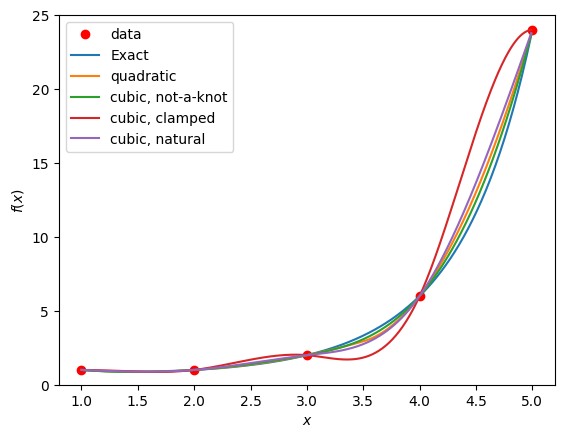

In [4]:
ip1 = interp1d(x_data, y_data, kind="quadratic")
ip2 = interp1d(x_data, y_data, kind="cubic")
ip3 = CubicSpline(x_data, y_data, bc_type="clamped")
ip4 = CubicSpline(x_data, y_data, bc_type="natural")
# Periodic boundary conditions don't work because the gamma function is not periodic
# (first data point and last data point don't have the same y-value)

plt.close()
plt.plot(x_data, y_data, "ro", label="data")
plt.plot(x, y, label="Exact")
plt.plot(x, ip1(x), label="quadratic")
plt.plot(x, ip2(x), label="cubic, not-a-knot")
plt.plot(x, ip3(x), label="cubic, clamped")
plt.plot(x, ip4(x), label="cubic, natural")
plt.ylim(0, 25)
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.legend()
plt.show()

### Part 2
- Now use Lagrange interpolation to obtain the Lagrange polynomial that approximates the gamma function starting from the above data points.
- Write a function that generates Chebysev points on the interval $[1, 5]$ and now use 5 of these points for Lagrange interpolation of the gamma function.
- Plot the results.

In [ ]:
# Implement your solution here

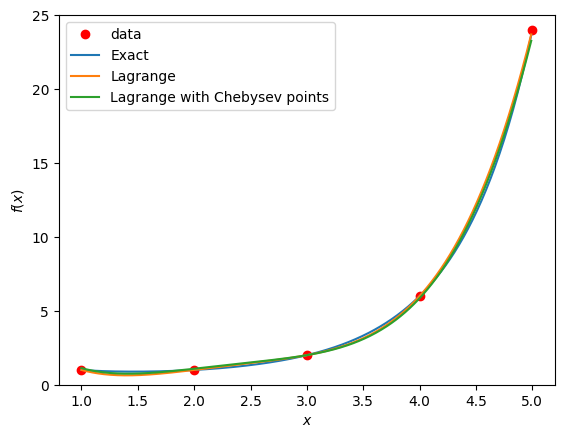

In [5]:
# https://math.stackexchange.com/questions/377169/going-from-a-value-inside-1-1-to-a-value-in-another-range
def chebysev(n, a, b):
    cheb_points = np.arange(1, n + 1)
    cheb_points = np.cos((2.0 * (cheb_points) - 1.0) * np.pi / (2.0 * n))
    cheb_points = (cheb_points + 1) * (b - a) / (2) + a
    return cheb_points


x_chebysev = chebysev(5, 1, 5)
y_chebysev = gamma(x_chebysev)

ip5 = lagrange(x_data, y_data)
ip6 = lagrange(x_chebysev, y_chebysev)

plt.close()
plt.plot(x_data, y_data, "ro", label="data")
plt.plot(x, y, label="Exact")
plt.plot(x, ip5(x), label="Lagrange")
plt.plot(x, ip6(x), label="Lagrange with Chebysev points")
plt.ylim(0, 25)
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.legend()
plt.show()

### Part 3

Calculate the risidual between the exact gamma function and your approximations on the intercal $[1, 5]$. Which approximation is best in which region?

In [ ]:
# Implement your solution here

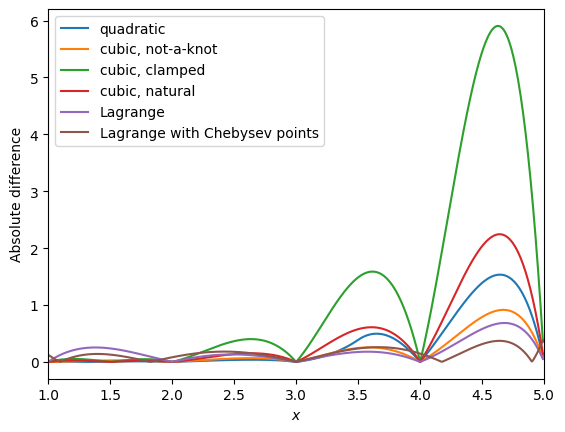

In [6]:
diff1 = np.abs(y - ip1(x))
diff2 = np.abs(y - ip2(x))
diff3 = np.abs(y - ip3(x))
diff4 = np.abs(y - ip4(x))
diff5 = np.abs(y - ip5(x))
diff6 = np.abs(y - ip6(x))

plt.close("all")
plt.plot(x, diff1, label="quadratic")
plt.plot(x, diff2, label="cubic, not-a-knot")
plt.plot(x, diff3, label="cubic, clamped")
plt.plot(x, diff4, label="cubic, natural")
plt.plot(x, diff5, label="Lagrange")
plt.plot(x, diff6, label="Lagrange with Chebysev points")
plt.xlim([1, 5])
plt.xlabel("$x$")
plt.ylabel("Absolute difference")
plt.legend()
plt.show()

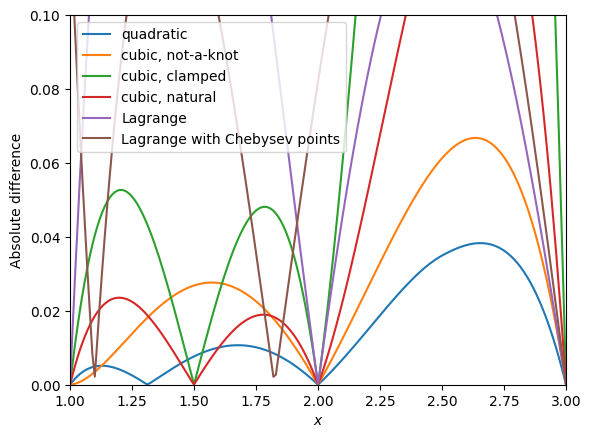

In [7]:
plt.close("all")
plt.plot(x, diff1, label="quadratic")
plt.plot(x, diff2, label="cubic, not-a-knot")
plt.plot(x, diff3, label="cubic, clamped")
plt.plot(x, diff4, label="cubic, natural")
plt.plot(x, diff5, label="Lagrange")
plt.plot(x, diff6, label="Lagrange with Chebysev points")
plt.xlim([1, 3])
plt.ylim([0, 0.1])
plt.xlabel("$x$")
plt.ylabel("Absolute difference")
plt.legend()
plt.show()

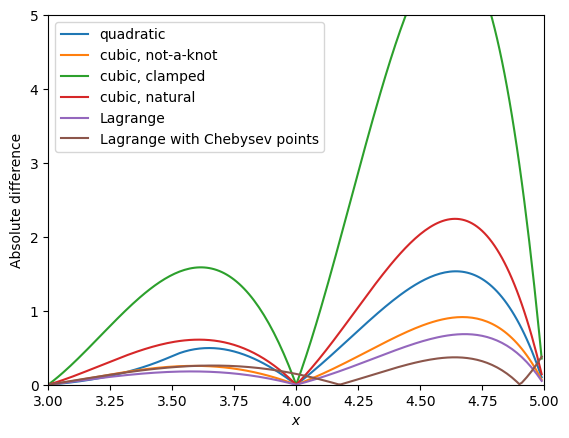

In [8]:
plt.close("all")
plt.plot(x, diff1, label="quadratic")
plt.plot(x, diff2, label="cubic, not-a-knot")
plt.plot(x, diff3, label="cubic, clamped")
plt.plot(x, diff4, label="cubic, natural")
plt.plot(x, diff5, label="Lagrange")
plt.plot(x, diff6, label="Lagrange with Chebysev points")
plt.xlim([3, 5])
plt.ylim([0, 5])
plt.xlabel("$x$")
plt.ylabel("Absolute difference")
plt.legend()
plt.show()